### Instructions
This unit is all about web scraping.  There are three main points to this assignment: 1) return specific pieces of information (instead of just downloading the whole page), 2) iterate over several pages, and 3) save the data.

After gathering the data, compute some statistical calculations or visualizations to share.  

I chose to use the Yelp API to search for Korean bbq (kbbq) businesses in Los Angeles, CA because who doesn't like kbbq? Due to the way I saved the information, I have 6 json files I need to append together.   Overall, I have information on 300 kbbq restaurants in the Los Angeles Area.  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_json('kbbq0.json')
df2 = pd.read_json('kbbq1.json')
df3 = pd.read_json('kbbq2.json')
df4 = pd.read_json('kbbq3.json')
df5 = pd.read_json('kbbq4.json')
df6 = pd.read_json('kbbq5.json')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis = 0)
df.reset_index(inplace= True, drop = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
alias            300 non-null object
categories       300 non-null object
coordinates      300 non-null object
display_phone    300 non-null object
distance         300 non-null float64
id               300 non-null object
image_url        300 non-null object
is_closed        300 non-null bool
location         300 non-null object
name             300 non-null object
phone            300 non-null object
price            289 non-null object
rating           300 non-null float64
review_count     300 non-null int64
transactions     300 non-null object
url              300 non-null object
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 35.5+ KB


In [5]:
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,hae-jang-chon-korean-bbq-restaurant-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...","{'longitude': -118.3061281, 'latitude': 34.063...",(213) 389-8777,1428.368051,JYGPEUZy4k5ObXGIjcD3DA,https://s3-media2.fl.yelpcdn.com/bphoto/UE_ZY3...,False,"{'city': 'Los Angeles', 'address2': '', 'count...",Hae Jang Chon Korean BBQ Restaurant,12133898777,$$,4.0,4864,[],https://www.yelp.com/biz/hae-jang-chon-korean-...
1,kang-ho-dong-baekjeong-los-angeles-4,"[{'title': 'Barbeque', 'alias': 'bbq'}, {'titl...","{'longitude': -118.2972751, 'latitude': 34.063...",(213) 384-9678,2233.423641,qAAoilHU25Qr45FOQlA19g,https://s3-media3.fl.yelpcdn.com/bphoto/izhJQs...,False,"{'city': 'Los Angeles', 'address2': '', 'count...",Kang Ho-dong Baekjeong,12133849678,$$,4.5,4191,[],https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,soowon-galbi-kbbq-restaurant-los-angeles-2,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...","{'longitude': -118.291338516533, 'latitude': 3...",(213) 365-9292,2826.075978,9FuxqbYXM0vaPnzrQ7B_qQ,https://s3-media3.fl.yelpcdn.com/bphoto/r9XjII...,False,"{'city': 'Los Angeles', 'address2': 'Ste C', '...",Soowon Galbi KBBQ Restaurant,12133659292,$$,4.5,2508,[],https://www.yelp.com/biz/soowon-galbi-kbbq-res...
3,road-to-seoul-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...","{'longitude': -118.30867, 'latitude': 34.04847}",(323) 731-9292,1867.839859,FlL2h3iROzhAIVBp3OaA9g,https://s3-media1.fl.yelpcdn.com/bphoto/fyDpBB...,False,"{'city': 'Los Angeles', 'address2': '', 'count...",Road To Seoul,13237319292,$$,4.0,3685,[restaurant_reservation],https://www.yelp.com/biz/road-to-seoul-los-ang...
4,ong-ga-nae-korean-bbq-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...","{'longitude': -118.2914951, 'latitude': 34.054...",(213) 386-9292,2874.653938,fBLnD9qxQggvDSPyOBsBLg,https://s3-media3.fl.yelpcdn.com/bphoto/5K5n0M...,False,"{'city': 'Los Angeles', 'address2': None, 'cou...",Ong Ga Nae Korean BBQ,12133869292,$$,4.5,507,[restaurant_reservation],https://www.yelp.com/biz/ong-ga-nae-korean-bbq...


For this exercise, there are some some information I don't need, so I will drop them.  In addition, I see that there are 11 restaurants without a price range.  I will also drop these.  

In [6]:
df.drop(['coordinates', 'distance', 'image_url', 'is_closed', 'id', 'url', 'phone'], axis = 1, inplace = True)
df.reset_index(inplace = True, drop = True)

In [7]:
df.isnull().sum()

alias             0
categories        0
display_phone     0
location          0
name              0
price            11
rating            0
review_count      0
transactions      0
dtype: int64

So I know LA and Koreatown specifically has a lot of kbbq establishments, but 300 sounds like it is a little high.  Sure enough, looking at the last 5 entries in the dataset, these are not kbbq establishments.  To filter out the kbbq restaurants,  I used the title and aliases in the 'categories' feature.  If some form of the keywords 'Korean' and 'bbq' are in there, then I'll say they are kbbq establishments.

In [20]:
df.tail(5)

,alias,categories,display_phone,location,name,price,rating,review_count,transactions,is_kbbq
295,ajisai-west-hollywood,"[{'title': 'Japanese', 'alias': 'japanese'}, {...",(310) 652-7014,"{'city': 'West Hollywood', 'address2': '', 'co...",Ajisai,$$,4.5,370,[pickup],False
296,izakaya-fu-ga-los-angeles,"[{'title': 'Bars', 'alias': 'bars'}, {'title':...",(213) 625-1722,"{'city': 'Los Angeles', 'address2': '', 'count...",Izakaya Fu-ga,$$,4.0,909,"[delivery, pickup, restaurant_reservation]",False
297,biergarten-los-angeles,"[{'title': 'Gastropubs', 'alias': 'gastropubs'...",(323) 466-4860,"{'city': 'Los Angeles', 'address2': None, 'cou...",Biergarten,$$,4.0,780,[pickup],False
298,men-oh-tokushima-ramen-los-angeles,"[{'title': 'Ramen', 'alias': 'ramen'}, {'title...",(213) 687-8485,"{'city': 'Los Angeles', 'address2': '', 'count...",Men Oh Tokushima Ramen,$$,4.0,1231,"[delivery, pickup]",False
299,sushi-ajito-los-angeles,"[{'title': 'Japanese', 'alias': 'japanese'}, {...",(323) 466-2460,"{'city': 'Los Angeles', 'address2': '', 'count...",Sushi Ajito,$$,3.5,281,"[delivery, pickup]",False


In [9]:
def find_kbbq(col):
    korean_keywords = ['Korean', 'korean']
    bbq_keywords = ['Barbeque', 'bbq']
    is_korean= False
    is_bbq = False
    for i in col:
        if i['title'] in korean_keywords or i['alias'] in korean_keywords:
            is_korean = True
        if i['alias'] in bbq_keywords or i['alias'] in bbq_keywords:
            is_bbq = True
    if all([is_korean, is_bbq]):
        return True
    else:
        return False

295    False
296    False
297    False
298    False
299    False
Name: categories, dtype: bool

In [15]:
df['is_kbbq'] = df['categories'].apply(find_kbbq)

In [30]:
kbbq_df = df[df['is_kbbq']==True]
kbbq_df.reset_index(inplace = True, drop = True)

notkbbq_df = df[df['is_kbbq']==False]
notkbbq_df.reset_index(inplace = True, drop = True)

Filtering out by keywords has reduced the number of establishments to 78.  Again, it isn't perfect, as I'm seeing soon tofu and a food truck at the end of the dataset, but its definitely filtered out a lot more.

In [27]:
print('Number of kbbq establishments: {}'.format(kbbq_df.shape[0]))

Number of kbbq establishments: 78


In [31]:
kbbq_df.tail()

,alias,categories,display_phone,location,name,price,rating,review_count,transactions,is_kbbq
73,feng-mao-lamb-kebab-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...",(213) 388-9299,"{'city': 'Los Angeles', 'address2': '', 'count...",Feng Mao Lamb Kebab,$$,4.0,456,[],True
74,kang-nam-restaurant-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...",(323) 937-1070,"{'city': 'Los Angeles', 'address2': '', 'count...",Kang Nam Restaurant,$$,3.5,132,[],True
75,beverly-soon-tofu-restaurant-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...",(213) 380-1113,"{'city': 'Los Angeles', 'address2': 'Ste 108',...",Beverly Soon Tofu Restaurant,$$,4.0,1491,[],True
76,kogi-bbq-truck-azul-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...",(323) 315-0253,"{'city': 'Los Angeles', 'address2': '', 'count...",Kogi BBQ Truck - Azul,$,3.5,2063,[],True
77,seoul-garden-restaurant-los-angeles,"[{'title': 'Korean', 'alias': 'korean'}, {'tit...",(213) 386-8477,"{'city': 'Los Angeles', 'address2': '', 'count...",Seoul Garden Restaurant,$$,4.0,512,"[delivery, pickup]",True


Now that I've found all the kbbq and non kbbq establishments, I want to know which ones are afforadable.  For those unfamiliar with Yelp's pricing symbols, it represents the price per person, where  \$= under \$10. \$\$=11-30. \$\$\$=31-60. and \$\$\$\$= over \$61.  For the most part, kbbq restaurants are in the 11-30 dollar range.  

In [32]:
def convert_price(col):
    if col == '$':
        return '< 10'
    elif col == '$$':
        return '11-30'
    elif col == '$$$':
        return '31-60'
    elif col == '$$$$':
        return '> 60'

In [33]:
kbbq_df['price'] = df['price'].apply(convert_price)
notkbbq_df['price'] = notkbbq_df['price'].apply(convert_price)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Kbbq seems to mainly exist in the 11-30 dollar range, with a few in the 31-60 dollar range.  There is one restauant under 10 dollars but checking their yelp page, they aren't a kbbq establishment. This is pretty in line with my kbbq experience; most of the kbq places I've been to are all you can eat (ayce) priced at around \$30, with non ayce places varying between 30 to 60 dollars. In comparison, non kbbq establishments are also in the 11-30 dollar range, but a greater percentage are under 10, and some places in the more than 30 dollars.  

In [54]:
price_order = ['< 10', '11-30', '31-60', '> 60']

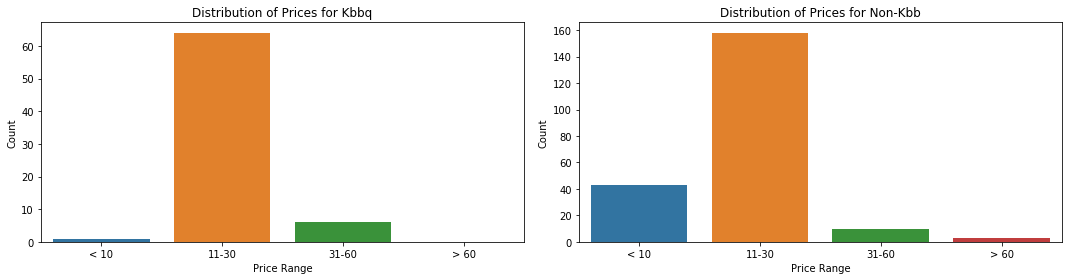

In [55]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))

sns.countplot(x = 'price', order = price_order, data = kbbq_df, ax = axis1)
sns.countplot(x = 'price', order = price_order, data = notkbbq_df, ax = axis2)

axis1.set_title('Distribution of Prices for Kbbq')
axis2.set_title('Distribution of Prices for Non-Kbb')

for ax in [axis1, axis2]:
    ax.set_xlabel('Price Range')
    ax.set_ylabel('Count')
    
plt.tight_layout()

In [42]:
kbbq_df['area_code'] = kbbq_df['display_phone'].apply(lambda x: x[1:4])
notkbbq_df['area_code'] = notkbbq_df['display_phone'].apply(lambda x: x[1:4])

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


A second aspect of this dataset I wanted to explore is the location of kbbq establishments. I do this by looking at what area codes they are located in.  

The first thing I notice is that there are only certain locations that have kbbq, namely in the 213 and 323 area codes.  Non kbbq establishments are also concentrated in these area codes, but there are two more area codes, plus some without phone numbers which turns out to be food trucks.  

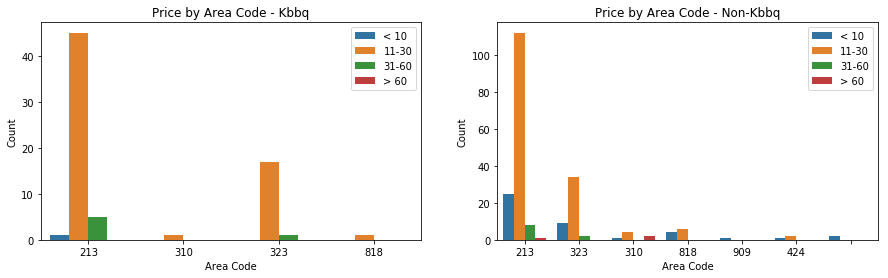

In [62]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))

sns.countplot(x = 'area_code', hue = 'price', hue_order=price_order, data = kbbq_df, ax = axis1)
sns.countplot(x = 'area_code', hue = 'price', hue_order=price_order, data = notkbbq_df, ax = axis2)

axis1.set_title('Price by Area Code - Kbbq')
axis2.set_title('Price by Area Code - Non-Kbbq')

for ax in [axis1, axis2]:
    ax.set_xlabel('Area Code')
    ax.set_ylabel('Count')
    ax.legend(loc = 'upper right')

Lastly, I wanted to look at if the number of reviews had any relationship with the rating.  Interestingly, for the most part most reviews have at least four stars, and very rarely are there any ratings under 3 stars.  I assume this is because restaurant competition is fierce and an establishment cannot survive if the ratings are bad.  

What really amazes me is that some establishments have over 2000 reviews, with one non kbbq establishment having over 8000 (Daikokuya Little Tokyo for the curious)!  Overall though, it seems like if an establishment has over 2000 reviews then it has at least 3.5 stars.    

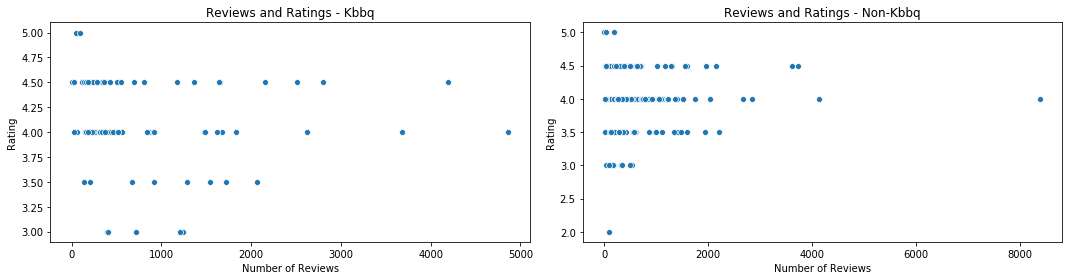

In [67]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))

sns.scatterplot(x = 'review_count', y = 'rating', data = kbbq_df, ax = axis1)
sns.scatterplot(x = 'review_count', y = 'rating', data = notkbbq_df, ax = axis2)

axis1.set_title('Reviews and Ratings - Kbbq')
axis2.set_title('Reviews and Ratings - Non-Kbbq')

for ax in [axis1, axis2]:
    ax.set_xlabel('Number of Reviews')
    ax.set_ylabel('Rating')
    
plt.tight_layout()

Overall, this has been a fun exercise in web scraping and gathering my own data.  